## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

Total params: 23,888,771
Trainable params: 301,059
Non-trainable params: 23,587,712
__________________________________________________________________________________________________


In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
2/2 [==============================] - 18s 9s/step - loss: 4.4299 - accuracy: 0.2812 - val_loss: 12.3023 - val_accuracy: 0.3276
Epoch 2/10
2/2 [==============================] - 13s 7s/step - loss: 8.2508 - accuracy: 0.2969 - val_loss: 4.6264 - val_accuracy: 0.1552
Epoch 3/10
2/2 [==============================] - 13s 7s/step - loss: 3.2817 - accuracy: 0.3438 - val_loss: 2.4705 - val_accuracy: 0.5862
Epoch 4/10
2/2 [==============================] - 13s 7s/step - loss: 4.1206 - accuracy: 0.4844 - val_loss: 3.6100 - val_accuracy: 0.3276
Epoch 5/10
2/2 [==============================] - 13s 7s/step - loss: 3.9863 - accuracy: 0.4219 - val_loss: 1.7065 - val_accuracy: 0.5862
Epoch 6/10
2/2 [==============================] - 13s 7s/step - loss: 1.7259 - accuracy: 0.3906 - val_loss: 3.5803 - val_accuracy: 0.1552
Epoch 7/10
2/2 [==============================] - 15s 7s/step - loss: 2.3652 - accuracy: 0.4219

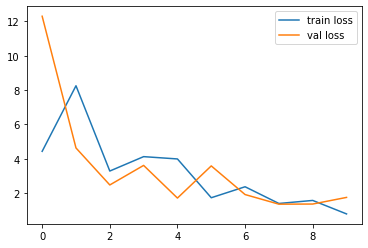

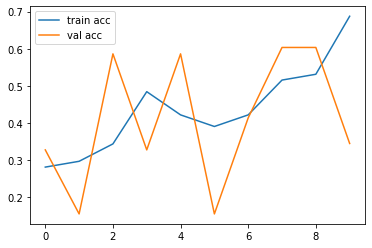

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [16]:

y_pred = model.predict(test_set)


In [17]:
y_pred

array([[3.66448164e-01, 3.93772982e-02, 5.94174504e-01],
       [3.88948768e-01, 6.57813028e-02, 5.45269966e-01],
       [6.29147112e-01, 3.08800563e-02, 3.39972824e-01],
       [4.13192004e-01, 4.75513712e-02, 5.39256632e-01],
       [8.15504849e-01, 1.53236119e-02, 1.69171542e-01],
       [2.28340447e-01, 2.34683469e-01, 5.36976099e-01],
       [1.90422326e-01, 4.96631227e-02, 7.59914577e-01],
       [9.25565511e-02, 2.78315753e-01, 6.29127681e-01],
       [6.74246132e-01, 6.35694563e-02, 2.62184381e-01],
       [4.87781651e-02, 1.02501698e-01, 8.48720133e-01],
       [3.47556382e-01, 4.29068021e-02, 6.09536767e-01],
       [9.01303351e-01, 5.60671510e-03, 9.30898637e-02],
       [7.01511204e-02, 3.29094417e-02, 8.96939397e-01],
       [6.94005013e-01, 2.18703803e-02, 2.84124553e-01],
       [2.24010050e-01, 4.11260407e-04, 7.75578678e-01],
       [6.60710633e-01, 2.45214924e-02, 3.14767927e-01],
       [1.48369297e-01, 4.66310754e-02, 8.04999590e-01],
       [1.13140889e-01, 2.67021

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [22]:
img_data

NameError: name 'img_data' is not defined

In [23]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [24]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

array([[2.2322575e-04, 2.9011646e-03, 9.9687564e-01]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
a==1

array([False])